<a href="https://colab.research.google.com/github/LuisIMT/compuIII_2023-1/blob/main/Opt1D_3_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos optimizacion unidimensionales

 3          
x  - 3⋅x + 2

busqueda ingenua
Mínimo encontrado:1.0001000100010002 y máximo encontrado: 8.0

Metodo newton
minimo de la funcion es 1.000000000000021316

busqueda dorada
Mínimo encontrado:-1 y máximo encontrado: 8



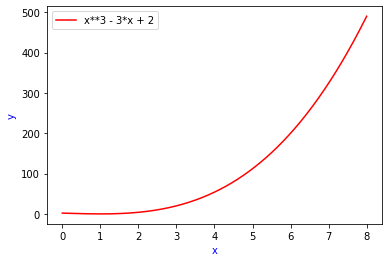

In [31]:
#importar librerías
import numpy as np
from sympy import *
import math
import time
from sympy.abc import x,y,z
import matplotlib.pyplot as plt
init_printing(use_latex='mathjax')


class Opt1D:
    def __init__(self,f):
        self.f = f
        self.tol = 0.00001
        self.maxIter = 10000

    def increSearch(self,start,end):
        intervalo = np.linspace(start,end,self.maxIter)
        min = np.inf
        max = -np.inf
        i_max = 0
        i_min = 0
        for num in intervalo:
            result = self.f.subs(x,num)
            if result > max:
                max = result
                i_max = num
            if result < min:
                min = result
                i_min = num
        return i_min,i_max

    def newtonMethod(self, x0):
        point = np.inf
        error = np.Inf

        der1 = diff(self.f,x)
        der2 = diff(der1,x)
        iter = 0
        
        while(error > self.tol and iter < self.maxIter):
            if der2 == 0:
                exit(0)
            x1 = x0 - der1.subs(x,x0) / der2.subs(x,x0)
            error = abs((x1-x0)/x0)
            iter += 1
            x0 = x1
        return x0
    
    def goldenSearch(self,a,b):
        iter = 0
        error = np.inf
        #d = ((np.sqrt(5)-1)/2)*(b-a)
        while(error > self.tol and iter < self.maxIter):
            d = ((np.sqrt(5)-1)/2)*(b-a)
            x1 = a + d
            x2 = b - d
            if self.f.subs(x,x1) < self.f.subs(x,x2):
                x1 = x2
            elif self.f.subs(x,1) > self.f.subs(x,x2):
                x2 = x1
            error = b - a
            iter += 1
        return a,b
        

    def graph1D(self,start,end,p):
        X = np.linspace(start,end,self.maxIter)
        Y = np.zeros_like(X)
        for i in range(len(X)):
            Y[i] = self.f.subs(x,X[i])
        fig, ax1 = plt.subplots()
        ax1.set_xlabel('x', color = 'b')
        ax1.set_ylabel('y', color = 'b')
        ax1.plot(X,Y, color = 'r', label = str(self.f))
        ax1.legend(loc= 'best')
        #plt.annotate('point',xy=(p,self.f.subs(x,p)), xytext =(0,0),arrowprops=dict(facecolor='black', shrink=0.005))
        #plt.scatter(p,self.f.subs(x,p) , marker='^')
        plt.show()
    

def main():

    function = x**3 - 3* x + 2
    function2 = 5*x**(1/2) -9*x +2
    display(function)

    objOpt = Opt1D(function)
    
    ##
    x_min, x_max =objOpt.increSearch(0,8)
    print('busqueda ingenua')
    print('Mínimo encontrado:' + str(x_min) +' y máximo encontrado: '+ str(x_max) + '\n')

    ###
    point = objOpt.newtonMethod(8)
    print("Metodo newton")
    #display(point)
    print("minimo de la funcion es %.18f\n"%point)
    ###### print("El mínimo es %f en %d iteraciones" % (x,n)) ######

    ###
    xMin, xMax =objOpt.goldenSearch(-1,8)
    print('busqueda dorada')
    print('Mínimo encontrado:' + str(xMin) +' y máximo encontrado: '+ str(xMax)+'\n')


    objOpt.graph1D(0,8,point)
if __name__ == "__main__":
    main()


Optimizacion 
